In [2]:
import os
import getpass

import mlflow
from configs import DAGSHUB_USER_NAME, DAGSHUB_REPO_NAME, MODEL_DIR, DEVICE
from utils import get_experiment_id, get_last_run_id

from fewshotdataloader import generate_loader, CARS

from utils import evaluate

import numpy as np
from utils import precision_recall_curve

import matplotlib.pyplot as plt

import torch
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
mlflow.set_tracking_uri(f'https://dagshub.com/{DAGSHUB_USER_NAME}/{DAGSHUB_REPO_NAME}.mlflow')

In [5]:
os.environ['MLFLOW_TRACKING_USERNAME'] = 'afhabibieee'
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass.getpass('enter pass: ')

In [6]:
def do_inference(
        run_id,
        n_way=5,
        n_shot=5,
        n_query=5,
        n_task=100,
):
        # dataset
        test_set = CARS(split='test', image_size=84)

        test_loader = generate_loader(
                'test',
                image_size=84,
                n_way=n_way,
                n_shot=n_shot,
                n_query=n_query,
                n_task=n_task,
                n_workers=2
        )

        # download model
        if not os.path.exists(os.path.join(MODEL_DIR, run_id)):
                mlflow.artifacts.download_artifacts(
                        run_id=run_id,
                        artifact_path='model',
                        dst_path=os.path.join(MODEL_DIR, run_id)
                )
        print("Artifacts downloaded in: {}".format(MODEL_DIR))

        # Load model
        logged_model = f'runs:/{run_id}/model'
        loaded_model = mlflow.pytorch.load_model(logged_model)
        print(f'run id: {run_id}')

        avg_accuracy, _, _, results, avg_time = evaluate(loaded_model, test_loader, test_set)

        result_path = f'../models/results/{run_id}.csv'
        with open(result_path, 'w') as file:
                for result in results:
                        file.write("%s\n" %result)
        
        thresholds = np.arange(start=0.4, stop=0.96, step=0.05)
        precisions, recalls, f1 = precision_recall_curve(result_path, thresholds)
        idx_f1_max = np.argmax(f1)

        desc = f"""
                {loaded_model.__class__.__name__} ({loaded_model.backbone.__class__.__name__})

                Setup:
                    ({n_way}-way; {n_shot}-shot; {n_query}-query)
                
                Desc:   
                    On average, the accuracy of {n_task} tasks in data 
                    testing using a {DEVICE.type.upper()} was {avg_accuracy:.3f}, with a processing 
                    time of {avg_time:.2f} seconds. The best F1 score was {f1[idx_f1_max]:.3f}, 
                    with recalls of {recalls[idx_f1_max]:.3f} and precisions of {precisions[idx_f1_max]:.3f}. The 
                    threshold confidence score for these results was {thresholds[idx_f1_max]:.2f}.
                """
        font = {'size': 11, 'color': 'grey', 'style': 'italic', 'family': 'Comic Sans MS'}
        plt.style.use('ggplot')
        plt.xlim([min(recalls)+.002, 1])
        plt.ylim([min(precisions)-.002, 1])
        plt.plot(recalls[idx_f1_max], precisions[idx_f1_max], '-ro')
        plt.plot(recalls, precisions, linewidth=2, color="red")
        plt.xlabel("Recall", fontdict=font, fontweight='bold')
        plt.ylabel("Precision", fontdict=font, fontweight='bold')
        plt.title("Precision-Recall Curve", fontdict=font, fontsize=15, fontweight="bold")
        plt.text(1.0002, min(precisions)+.0002, desc, fontdict=font)
        plt.show()

### A model trained with 5-way 5-shot

Artifacts downloaded in: ../models/saved model


2022/12/09 05:21:41 WARNING mlflow.pytorch: Stored model version '1.12.1+cu102' does not match installed PyTorch version '1.13.0+cpu'


run id: c647a2612ffb4440930a5b17da7ab462


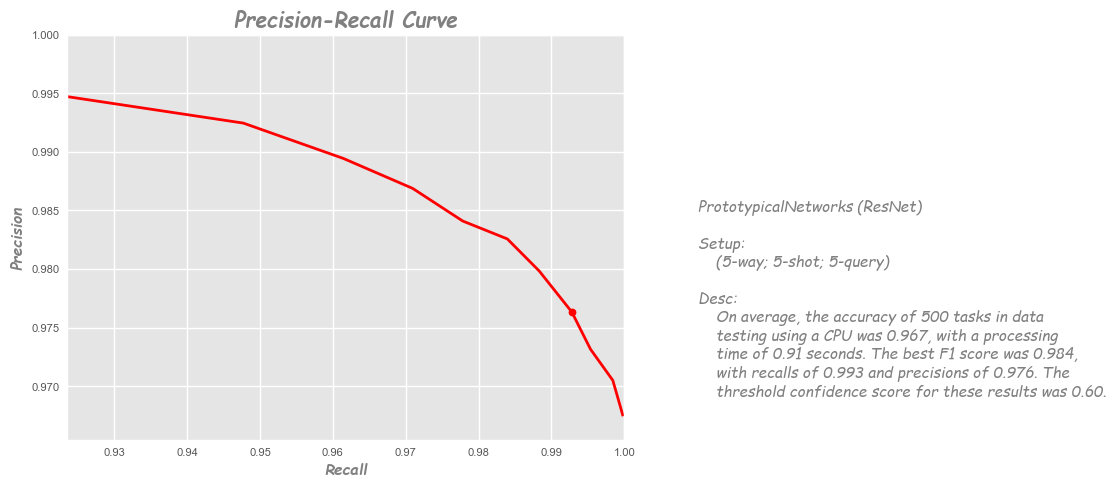

In [292]:
# first model
run_id = 'c647a2612ffb4440930a5b17da7ab462'
do_inference(run_id, n_task=500)

Artifacts downloaded in: ../models/saved model


2022/12/09 05:30:19 WARNING mlflow.pytorch: Stored model version '1.12.1+cu102' does not match installed PyTorch version '1.13.0+cpu'


run id: abbda0848d0e4aacb6bdcd1eeb0694d8


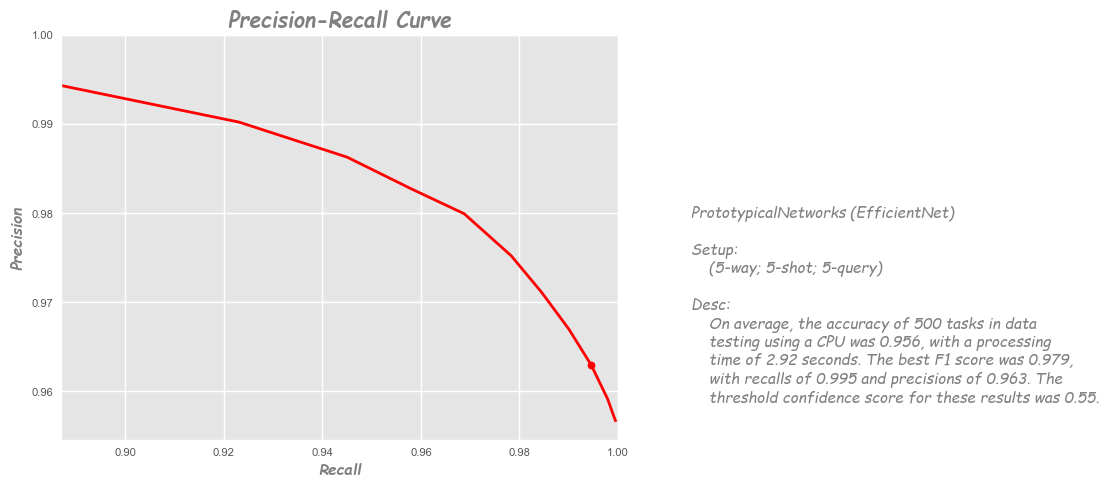

In [293]:
# second model
run_id = 'abbda0848d0e4aacb6bdcd1eeb0694d8'
do_inference(run_id, n_task=500)

Artifacts downloaded in: ../models/saved model


2022/12/09 05:56:31 WARNING mlflow.pytorch: Stored model version '1.12.1+cu102' does not match installed PyTorch version '1.13.0+cpu'


run id: b270c73d063e49949583c0485b56f065


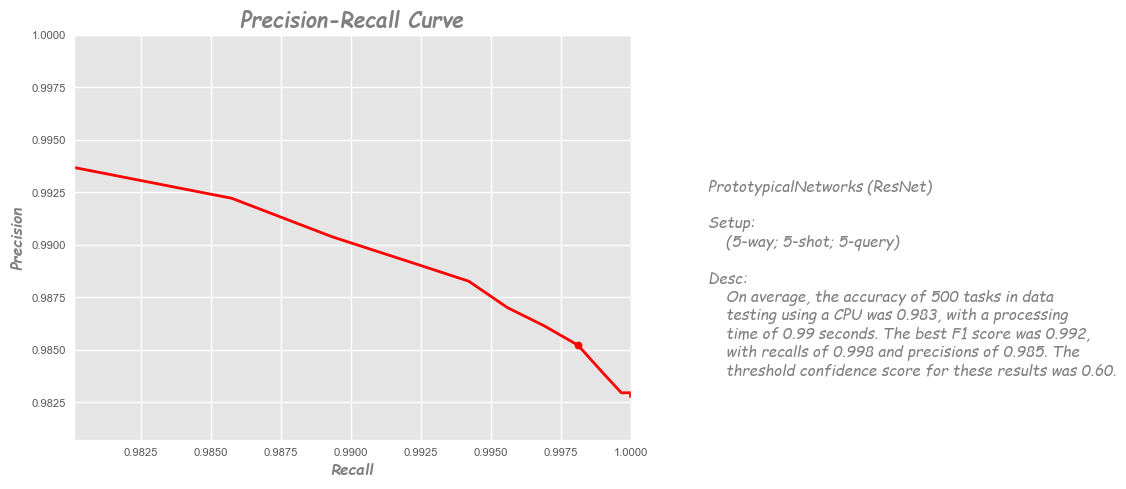

In [294]:
# third model (BEST MODEL)
run_id = 'b270c73d063e49949583c0485b56f065'
do_inference(run_id, n_task=500)

Artifacts downloaded in: ../models/saved model


2022/12/09 06:05:25 WARNING mlflow.pytorch: Stored model version '1.12.1+cu102' does not match installed PyTorch version '1.13.0+cpu'


run id: b270c73d063e49949583c0485b56f065


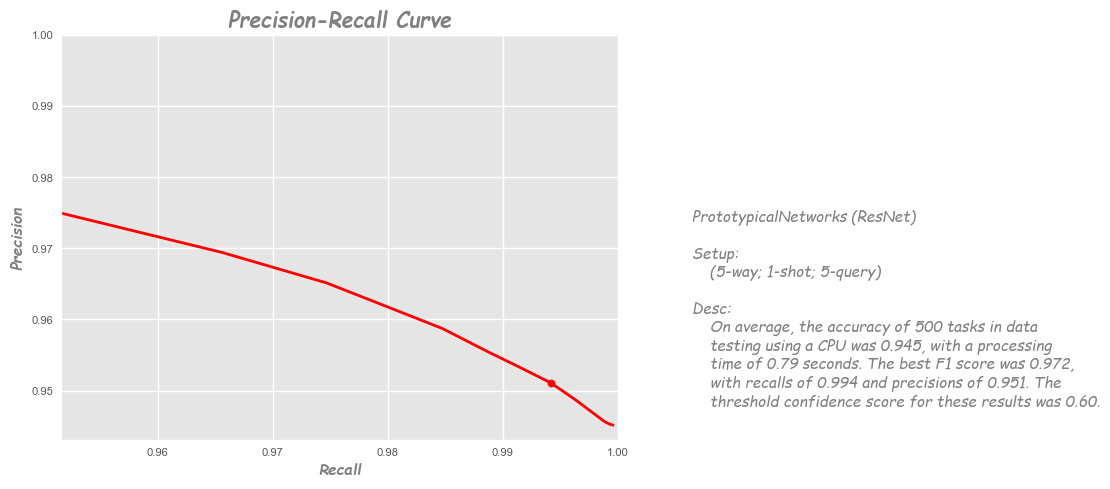

In [295]:
# third model
run_id = 'b270c73d063e49949583c0485b56f065'
do_inference(run_id, n_shot=1, n_task=500)

Artifacts downloaded in: ../models/saved model


2022/12/09 06:12:44 WARNING mlflow.pytorch: Stored model version '1.12.1+cu102' does not match installed PyTorch version '1.13.0+cpu'


run id: b270c73d063e49949583c0485b56f065


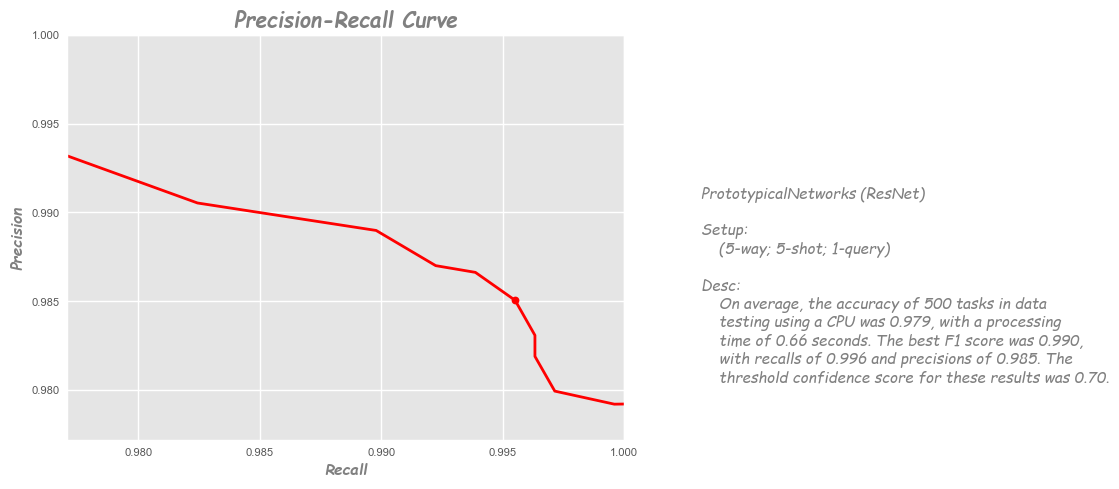

In [296]:
# third model
run_id = 'b270c73d063e49949583c0485b56f065'
do_inference(run_id, n_shot=5, n_query=1, n_task=500)

Artifacts downloaded in: ../models/saved model


2022/12/09 07:16:32 WARNING mlflow.pytorch: Stored model version '1.12.1+cu102' does not match installed PyTorch version '1.13.0+cpu'


run id: b270c73d063e49949583c0485b56f065


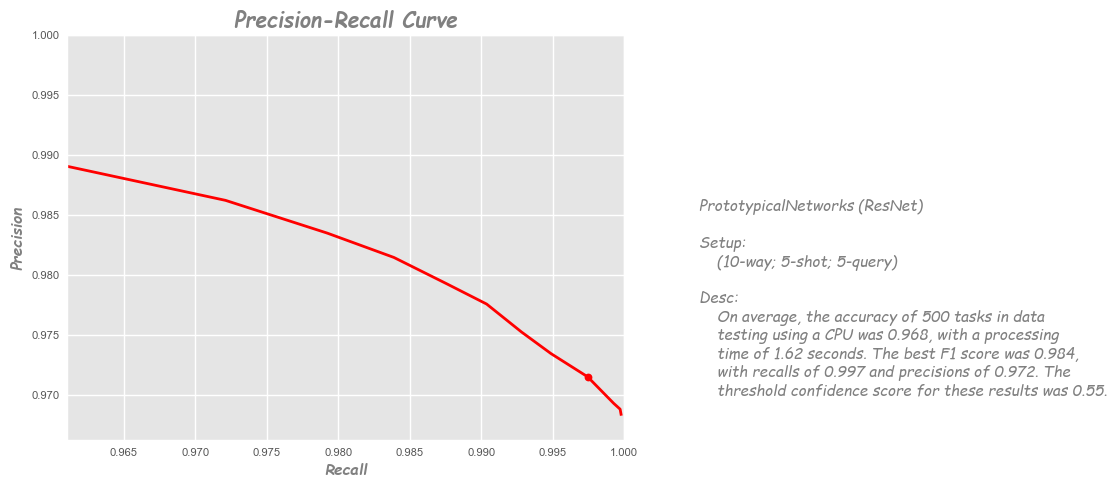

In [299]:
# third model
run_id = 'b270c73d063e49949583c0485b56f065'
do_inference(run_id, n_way=10, n_task=500)

Artifacts downloaded in: ../models/saved model


2022/12/09 06:18:54 WARNING mlflow.pytorch: Stored model version '1.12.1+cu102' does not match installed PyTorch version '1.13.0+cpu'


run id: b270c73d063e49949583c0485b56f065


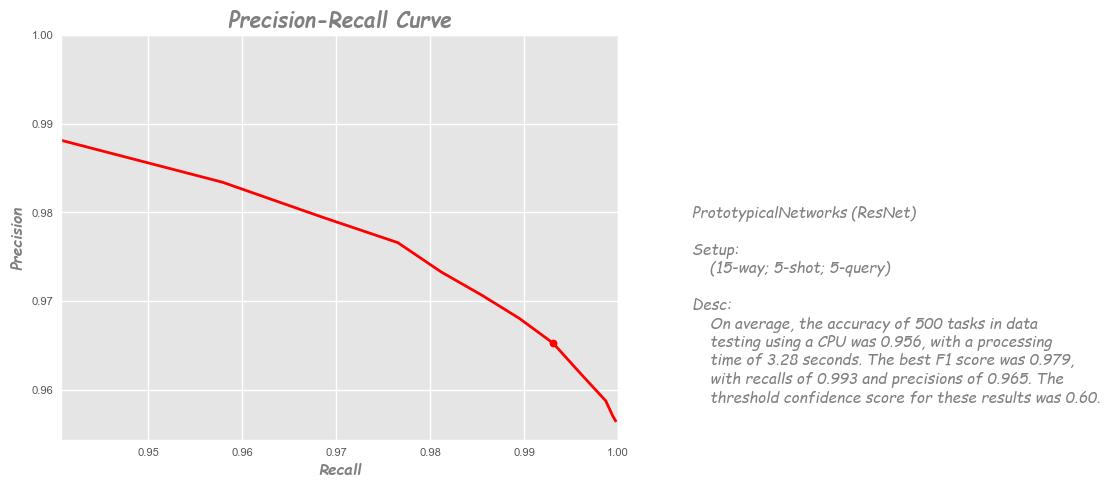

In [297]:
# third model
run_id = 'b270c73d063e49949583c0485b56f065'
do_inference(run_id, n_way=15, n_task=500)

Artifacts downloaded in: ../models/saved model


2022/12/09 06:47:39 WARNING mlflow.pytorch: Stored model version '1.12.1+cu102' does not match installed PyTorch version '1.13.0+cpu'


run id: b270c73d063e49949583c0485b56f065


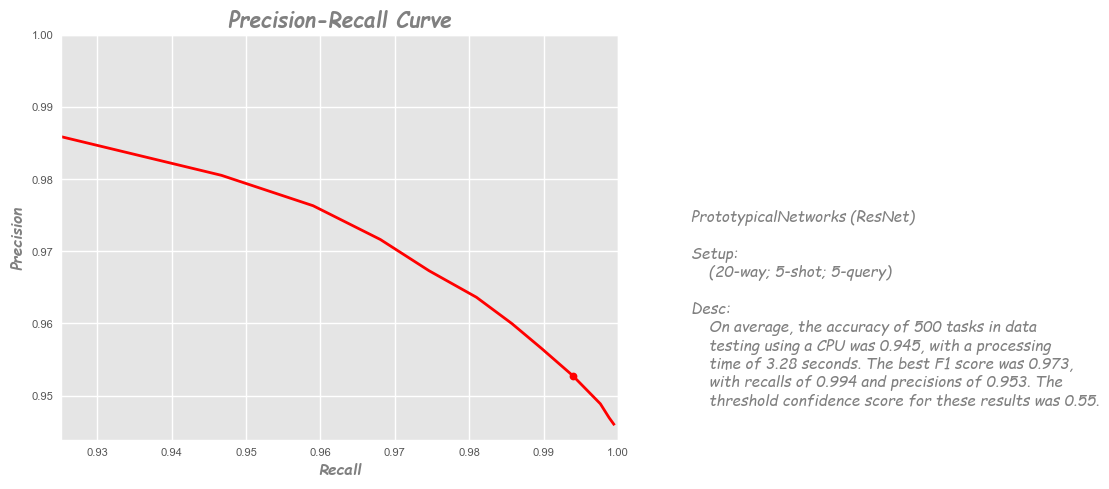

In [298]:
# third model
run_id = 'b270c73d063e49949583c0485b56f065'
do_inference(run_id, n_way=20, n_task=500)

### A model trained with 10-way 5-shot

Artifacts downloaded in: ../models/saved model


2022/12/09 11:59:22 WARNING mlflow.pytorch: Stored model version '1.12.1+cu102' does not match installed PyTorch version '1.13.0+cpu'


run id: 026303d4836a4e659851c86ac7d65a0a


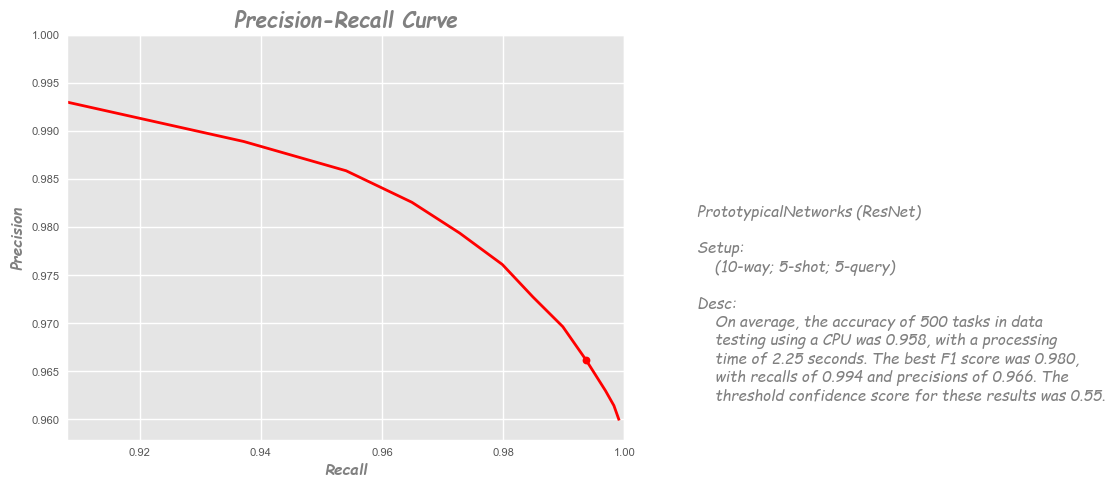

In [300]:
# fourth model
run_id = '026303d4836a4e659851c86ac7d65a0a'
do_inference(run_id, n_way=10, n_task=500)

Artifacts downloaded in: ../models/saved model


2022/12/09 12:20:02 WARNING mlflow.pytorch: Stored model version '1.12.1+cu102' does not match installed PyTorch version '1.13.0+cpu'


run id: 026303d4836a4e659851c86ac7d65a0a


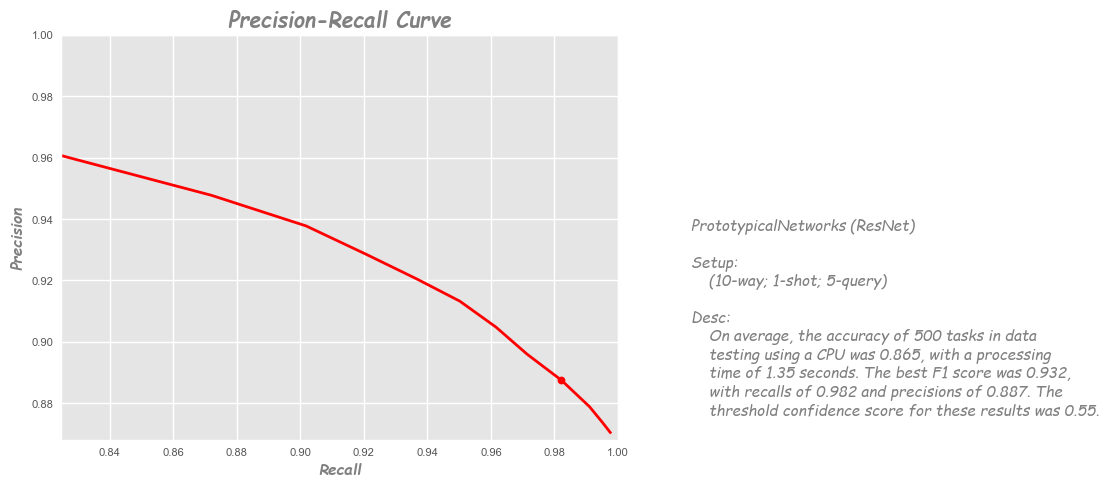

In [301]:
# fourth model
run_id = '026303d4836a4e659851c86ac7d65a0a'
do_inference(run_id, n_way=10, n_shot=1, n_task=500)

### Benchmarking the differences between n-way and n-shot with the best model

In [4]:
def benchmark(loaded_model, n_ways, n_shots, metrics):
    results = []
    for n_way in n_ways:
        result = []
        for n_shot in n_shots:
            test_set = CARS(split='test', image_size=84)
            test_loader = generate_loader(
                'test',
                n_way=n_way,
                n_shot=n_shot,
                n_query=5,
                n_task=500,
                n_workers=8
            )
            avg_accuracy, avg_recall, avg_precision, _, _ = evaluate(loaded_model, test_loader, test_set)
            result.extend([avg_accuracy, avg_recall, avg_precision])
        results.append(result)
    
    header = [
        [f"{shot}-shot" for shot in n_shots for i in range(len(metrics))],
        [*[metric for metric in metrics]*len(n_shots)]
    ]

    df = pd.DataFrame(
        results,
        index=[f"{way}-way" for way in n_ways], 
        columns = header
    )
    
    return df.style.set_caption("Selected Best Model Inference Benchmarks").set_table_styles([{
        'selector': 'caption',
        'props': [
            ('font-size', '20px')
        ]
    }])

In [5]:
# Load torch model
run_id = 'b270c73d063e49949583c0485b56f065'
logged_model = f'../models/saved model/{run_id}/model/data/model.pth'
loaded_model = torch.load(logged_model).to(DEVICE).eval()

In [6]:
n_ways = [5, 10, 15, 20]
n_shots = [1, 5, 10]
metrics = ['accuracy', 'precision', 'recall']
results = benchmark(loaded_model, n_ways, n_shots, metrics)

In [9]:
results

In [11]:
results.data.to_csv('../models/benchmarks.csv', index=True, header=True)

In [12]:
# Ploting benchmarks
def plot_benchmark(metric):
    font = {'size': 11, 'color': 'grey', 'style': 'italic', 'family': 'Comic Sans MS'}
    plt.style.use('ggplot')
    columns = [i if metric=='Accuracy' else i+1 if metric=='Precision' else i+2 for i in [0, 3, 6]]
    for i in columns:
        plt.plot((n_ways), results.data.iloc[:, i], '-o', label=results.data.columns[i][0])
    plt.xticks(n_ways, results.data.index)
    plt.title(f'Average {metric} by K-Way and K-Shot', fontdict=font, fontsize=15, fontweight="bold")
    plt.ylabel(f'Average {metric}', fontdict=font, fontweight='bold')
    plt.ylim(top=1)
    plt.legend()
    plt.show()

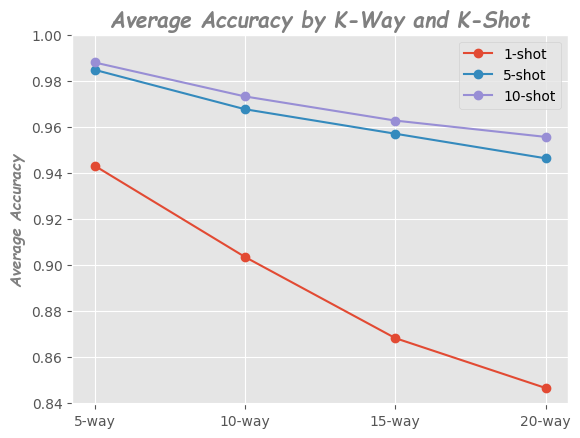

In [13]:
plot_benchmark('Accuracy')

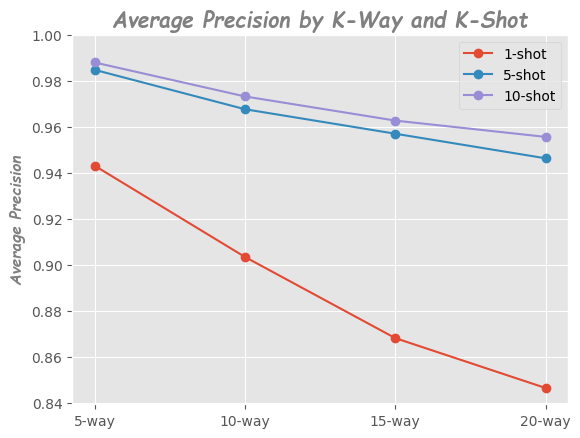

In [14]:
plot_benchmark('Precision')

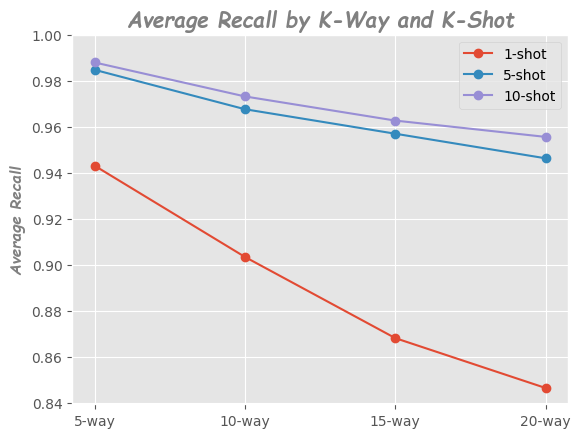

In [15]:
plot_benchmark('Recall')